In [ ]:
# Import library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
# Load datasets
data_tky = pd.read_csv('dataset_TSMC2014_TKY.csv')
data_nyc = pd.read_csv('dataset_TSMC2014_NYC.csv')
data_tky.head(5)
data_nyc.head(5)


,userId,venueId,venueCategoryId,venueCategory,latitude,longitude,timezoneOffset,utcTimestamp
0,1541,4f0fd5a8e4b03856eeb6c8cb,4bf58dd8d48988d10c951735,Cosmetics Shop,35.705101,139.619590,540,Tue Apr 03 18:17:18 +0000 2012
1,868,4b7b884ff964a5207d662fe3,4bf58dd8d48988d1d1941735,Ramen / Noodle House,35.715581,139.800317,540,Tue Apr 03 18:22:04 +0000 2012
2,114,4c16fdda96040f477cc473a5,4d954b0ea243a5684a65b473,Convenience Store,35.714542,139.480065,540,Tue Apr 03 19:12:07 +0000 2012
3,868,4c178638c2dfc928651ea869,4bf58dd8d48988d118951735,Food & Drink Shop,35.725592,139.776633,540,Tue Apr 03 19:12:13 +0000 2012
4,1458,4f568309e4b071452e447afe,4f2a210c4b9023bd5841ed28,Housing Development,35.656083,139.734046,540,Tue Apr 03 19:18:23 +0000 2012
5,1541,4b83b207f964a5202c0d31e3,4bf58dd8d48988d1f8941735,Furniture / Home Store,35.705074,139.619502,540,Tue Apr 03 19:20:09 +0000 2012
6,1541,4ea281c302d529c116a57755,4d954b0ea243a5684a65b473,Convenience Store,35.706277,139.617782,540,Tue Apr 03 19:21:00 +0000 2012
7,114,4b3eae5cf964a520b4a025e3,4bf58dd8d48988d129951735,Train Station,35.700253,139.480255,540,Tue Apr 03 19:35:36 +0000 2012
8,1635,4cca7bd67965b60c80f0858a,4bf58dd8d48988d162941735,Other Great Outdoors,35.755759,139.733573,540,Tue Apr 03 19:51:50 +0000 2012
9,2033,4b5c7671f964a520083129e3,4bf58dd8d48988d1d1941735,Ramen / Noodle House,35.693121,139.699447,540,Tue Apr 03 19:51:59 +0000 2012


In [ ]:
data_nyc.head(10)

,userId,venueId,venueCategoryId,venueCategory,latitude,longitude,timezoneOffset,utcTimestamp
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,-240,Tue Apr 03 18:00:25 +0000 2012
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,-240,Tue Apr 03 18:02:24 +0000 2012
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,-240,Tue Apr 03 18:02:41 +0000 2012
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,Tue Apr 03 18:03:00 +0000 2012
5,484,4b5b981bf964a520900929e3,4bf58dd8d48988d118951735,Food & Drink Shop,40.690427,-73.954687,-240,Tue Apr 03 18:04:00 +0000 2012
6,642,4ab966c3f964a5203c7f20e3,4bf58dd8d48988d1e0931735,Coffee Shop,40.751591,-73.974121,-240,Tue Apr 03 18:04:38 +0000 2012
7,292,4d0cc47f903d37041864bf55,4bf58dd8d48988d12b951735,Bus Station,40.779422,-73.955341,-240,Tue Apr 03 18:04:42 +0000 2012
8,428,4ce1863bc4f6a35d8bd2db6c,4bf58dd8d48988d103941735,Home (private),40.619151,-74.035888,-240,Tue Apr 03 18:06:18 +0000 2012
9,877,4be319b321d5a59352311811,4bf58dd8d48988d10a951735,Bank,40.619006,-73.990375,-240,Tue Apr 03 18:06:19 +0000 2012


In [ ]:

# Check for null values
print("Null values in Tokyo dataset:")
print(data_tky.isnull().sum())
print("\nNull values in NYC dataset:")
print(data_nyc.isnull().sum())

Null values in Tokyo dataset:
userId             0
venueId            0
venueCategoryId    0
venueCategory      0
latitude           0
longitude          0
timezoneOffset     0
utcTimestamp       0
dtype: int64

Null values in NYC dataset:
userId             0
venueId            0
venueCategoryId    0
venueCategory      0
latitude           0
longitude          0
timezoneOffset     0
utcTimestamp       0
dtype: int64


In [ ]:
# Remove null values if any
data_tky = data_tky.dropna()
data_nyc = data_nyc.dropna()

In [ ]:
# Add local time
data_tky['utcTimestamp'] = pd.to_datetime(data_tky['utcTimestamp'])
data_nyc['utcTimestamp'] = pd.to_datetime(data_nyc['utcTimestamp'])
data_tky['localTime'] = data_tky['utcTimestamp'] + pd.to_timedelta(data_tky['timezoneOffset'], unit='m')
data_nyc['localTime'] = data_nyc['utcTimestamp'] + pd.to_timedelta(data_nyc['timezoneOffset'], unit='m')


<ipython-input-5-0375d3ebdfd8>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_tky['utcTimestamp'] = pd.to_datetime(data_tky['utcTimestamp'])
<ipython-input-5-0375d3ebdfd8>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_nyc['utcTimestamp'] = pd.to_datetime(data_nyc['utcTimestamp'])


In [ ]:

# Extract hour and day of the week
data_tky['hour'] = data_tky['localTime'].dt.hour
data_tky['day_of_week'] = data_tky['localTime'].dt.dayofweek
data_nyc['hour'] = data_nyc['localTime'].dt.hour
data_nyc['day_of_week'] = data_nyc['localTime'].dt.dayofweek

In [ ]:
# Step 3: Add time period column
def time_period(hour):
    if 5 <= hour < 12:
        return 'Pagi'
    elif 12 <= hour < 17:
        return 'Siang'
    elif 17 <= hour < 22:
        return 'Sore'
    else:
        return 'Malam'

data_tky['period'] = data_tky['hour'].apply(time_period)
data_nyc['period'] = data_nyc['hour'].apply(time_period)


In [ ]:
# Step 4: Categorize venue types
def categorize_venue(venue):
    modern_entertainment = ['Bar', 'Restaurant', 'Mall', 'Coffee Shop', 'Nightlife Spot']
    cultural = ['Shrine', 'Temple', 'Park', 'Museum', 'Art Gallery']

    if venue in modern_entertainment:
        return 'Modern Entertainment'
    elif venue in cultural:
        return 'Cultural'
    else:
        return 'Other'

data_tky['venueCategoryGrouped'] = data_tky['venueCategory'].apply(categorize_venue)
data_nyc['venueCategoryGrouped'] = data_nyc['venueCategory'].apply(categorize_venue)


In [ ]:
# Step 5: Combine datasets for comparison
data_tky['city'] = 'Tokyo'
data_nyc['city'] = 'New York'
data_combined = pd.concat([data_tky, data_nyc], ignore_index=True)

In [ ]:
# Step 6: Split data into training and testing sets
train_tky, test_tky = train_test_split(data_tky, test_size=0.2, random_state=42)
train_nyc, test_nyc = train_test_split(data_nyc, test_size=0.2, random_state=42)

print(f"Tokyo training set size: {len(train_tky)}")
print(f"Tokyo testing set size: {len(test_tky)}")
print(f"NYC training set size: {len(train_nyc)}")
print(f"NYC testing set size: {len(test_nyc)}")


Tokyo training set size: 458962
Tokyo testing set size: 114741
NYC training set size: 181942
NYC testing set size: 45486


In [ ]:
# Save preprocessed datasets (Optional)
train_tky.to_csv('train_tky.csv', index=False)
test_tky.to_csv('test_tky.csv', index=False)
train_nyc.to_csv('train_nyc.csv', index=False)
test_nyc.to_csv('test_nyc.csv', index=False)



In [ ]:
data_test_tky = pd.read_csv('test_tky.csv')
data_test_tky.head(5)

,userId,venueId,venueCategoryId,venueCategory,latitude,longitude,timezoneOffset,utcTimestamp,localTime,hour,day_of_week,period,venueCategoryGrouped,city
0,1251,4e2183d918a88345f04c0e1e,4bf58dd8d48988d129951735,Train Station,35.562631,139.716053,540,2012-04-28 06:03:14+00:00,2012-04-28 15:03:14+00:00,15,5,Siang,Other,Tokyo
1,422,4e02bdf0b0fb88a1209b637b,4bf58dd8d48988d172941735,Post Office,35.709604,139.797187,540,2012-12-05 07:48:01+00:00,2012-12-05 16:48:01+00:00,16,2,Siang,Other,Tokyo
2,1575,4b0bc75ff964a520923323e3,4bf58dd8d48988d114951735,Bookstore,35.700427,139.771752,540,2012-05-12 08:13:14+00:00,2012-05-12 17:13:14+00:00,17,5,Sore,Other,Tokyo
3,1492,4b1ac490f964a5205af123e3,4bf58dd8d48988d1fd931735,Subway,35.729496,139.791305,540,2012-06-13 23:19:38+00:00,2012-06-14 08:19:38+00:00,8,3,Pagi,Other,Tokyo
4,2150,4b77a899f964a520e0a52ee3,4bf58dd8d48988d1df941735,Bridge,35.679187,139.781590,540,2012-07-02 14:30:11+00:00,2012-07-02 23:30:11+00:00,23,0,Malam,Other,Tokyo


In [ ]:
data_test_nyc = pd.read_csv('test_nyc.csv')
data_test_nyc.head(5)

,userId,venueId,venueCategoryId,venueCategory,latitude,longitude,timezoneOffset,utcTimestamp,localTime,hour,day_of_week,period,venueCategoryGrouped,city
0,419,4a6f8c85f964a52079d61fe3,4bf58dd8d48988d1f6941735,Department Store,40.792629,-74.041886,-240,2012-06-18 10:17:29+00:00,2012-06-18 06:17:29+00:00,6,0,Pagi,Other,New York
1,13,4daddba56a23e6c9347e1092,4bf58dd8d48988d1a3941735,College Academic Building,40.911190,-73.907111,-300,2012-12-15 19:30:04+00:00,2012-12-15 14:30:04+00:00,14,5,Siang,Other,New York
2,349,4f79a81ae4b09489387bafb6,4bf58dd8d48988d146941735,Deli / Bodega,40.832612,-73.915352,-300,2013-01-26 13:26:41+00:00,2013-01-26 08:26:41+00:00,8,5,Pagi,Other,New York
3,216,4dbb09d5ffcbcd48566371bf,4c38df4de52ce0d596b336e1,Parking,40.763384,-73.985095,-240,2012-05-15 22:59:41+00:00,2012-05-15 18:59:41+00:00,18,1,Sore,Other,New York
4,545,4dab7425fa8cc764974da770,4f2a25ac4b909258e854f55f,Neighborhood,40.682690,-73.931737,-240,2012-07-15 13:42:05+00:00,2012-07-15 09:42:05+00:00,9,6,Pagi,Other,New York


In [ ]:
data_train_tky = pd.read_csv('train_tky.csv')
data_train_tky.head(5)

,userId,venueId,venueCategoryId,venueCategory,latitude,longitude,timezoneOffset,utcTimestamp,localTime,hour,day_of_week,period,venueCategoryGrouped,city
0,1614,4b243a7df964a520356424e3,4bf58dd8d48988d129951735,Train Station,35.729865,139.710956,540,2013-01-30 14:59:22+00:00,2013-01-30 23:59:22+00:00,23,2,Malam,Other,Tokyo
1,437,4b554874f964a520bde027e3,4bf58dd8d48988d1f8941735,Furniture / Home Store,35.646995,139.517577,540,2012-06-07 03:22:25+00:00,2012-06-07 12:22:25+00:00,12,3,Siang,Other,Tokyo
2,1648,4d7dfe62cd09224bd4934130,4bf58dd8d48988d1fe931735,Bus Station,35.655666,139.711070,540,2012-06-07 11:59:39+00:00,2012-06-07 20:59:39+00:00,20,3,Sore,Other,Tokyo
3,2057,4e60e20afa76cd64cd8a6022,4bf58dd8d48988d1fd941735,Mall,35.753287,139.709707,540,2012-11-18 07:36:50+00:00,2012-11-18 16:36:50+00:00,16,6,Siang,Modern Entertainment,Tokyo
4,1699,4b5bf03cf964a520131e29e3,4bf58dd8d48988d122951735,Electronics Store,35.699299,139.769603,540,2012-04-22 04:01:53+00:00,2012-04-22 13:01:53+00:00,13,6,Siang,Other,Tokyo


In [ ]:
data_train_nyc = pd.read_csv('train_nyc.csv')
data_train_nyc.head(5)

,userId,venueId,venueCategoryId,venueCategory,latitude,longitude,timezoneOffset,utcTimestamp,localTime,hour,day_of_week,period,venueCategoryGrouped,city
0,213,4ba37c86f964a520414138e3,4bf58dd8d48988d139941735,Synagogue,40.773157,-73.955198,-240,2012-05-27 13:57:50+00:00,2012-05-27 09:57:50+00:00,9,6,Pagi,Other,New York
1,26,451ad4f2f964a5206a3a1fe3,4bf58dd8d48988d116941735,Bar,40.872853,-74.021454,-240,2012-05-12 19:56:03+00:00,2012-05-12 15:56:03+00:00,15,5,Siang,Modern Entertainment,New York
2,954,4d31e790c6cba35dfad61b7a,4bf58dd8d48988d132941735,Church,40.891131,-74.002018,-240,2012-08-05 16:37:18+00:00,2012-08-05 12:37:18+00:00,12,6,Siang,Other,New York
3,819,4c74429d66be6dcbc83bbd0f,4bf58dd8d48988d130941735,Building,40.673900,-73.872427,-240,2012-06-18 01:59:14+00:00,2012-06-17 21:59:14+00:00,21,6,Sore,Other,New York
4,395,4ace6c89f964a52078d020e3,4bf58dd8d48988d1ed931735,Airport,40.773839,-73.871220,-240,2012-05-11 12:59:39+00:00,2012-05-11 08:59:39+00:00,8,4,Pagi,Other,New York


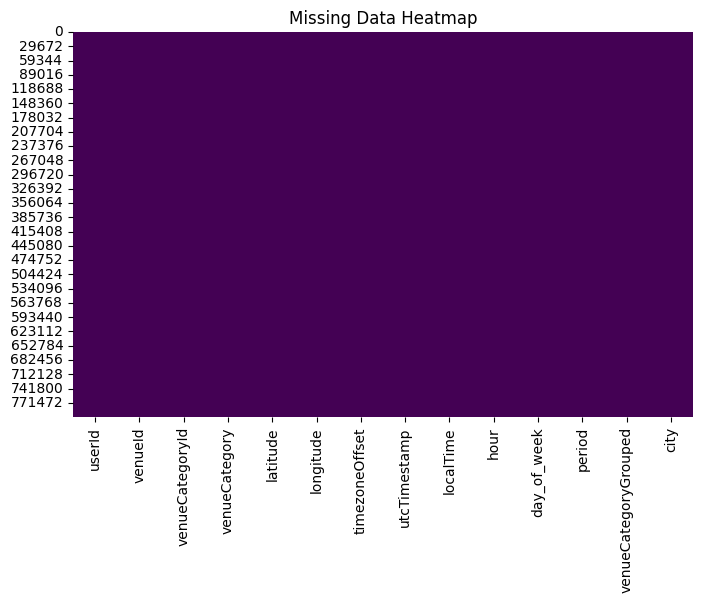

In [ ]:
# Step 7: Visualize Missing Data
plt.figure(figsize=(8, 5))
sns.heatmap(data_combined.isnull(), cbar=False, cmap="viridis")
plt.title('Missing Data Heatmap')
plt.show()

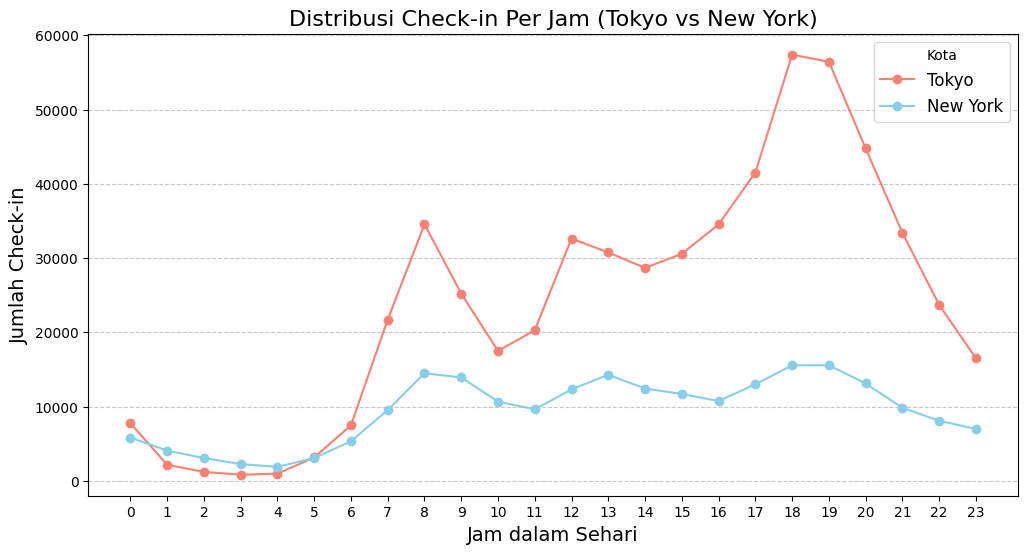

In [ ]:
import matplotlib.pyplot as plt

# Hitung jumlah check-in per jam untuk setiap kota
checkin_tky = data_tky.groupby('hour').size()
checkin_nyc = data_nyc.groupby('hour').size()

# Plot line chart
plt.figure(figsize=(12, 6))
plt.plot(checkin_tky.index, checkin_tky.values, label='Tokyo', marker='o', color='salmon')
plt.plot(checkin_nyc.index, checkin_nyc.values, label='New York', marker='o', color='skyblue')

# Tambahkan detail pada plot
plt.title('Distribusi Check-in Per Jam (Tokyo vs New York)', fontsize=16)
plt.xlabel('Jam dalam Sehari', fontsize=14)
plt.ylabel('Jumlah Check-in', fontsize=14)
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Kota', loc='upper right', fontsize=12)
plt.show()


In [ ]:
print(data_combined.head())
print(data_combined.columns)


   userId                   venueId           venueCategoryId  \
0    1541  4f0fd5a8e4b03856eeb6c8cb  4bf58dd8d48988d10c951735   
1     868  4b7b884ff964a5207d662fe3  4bf58dd8d48988d1d1941735   
2     114  4c16fdda96040f477cc473a5  4d954b0ea243a5684a65b473   
3     868  4c178638c2dfc928651ea869  4bf58dd8d48988d118951735   
4    1458  4f568309e4b071452e447afe  4f2a210c4b9023bd5841ed28   

           venueCategory   latitude   longitude  timezoneOffset  \
0         Cosmetics Shop  35.705101  139.619590             540   
1  Ramen /  Noodle House  35.715581  139.800317             540   
2      Convenience Store  35.714542  139.480065             540   
3      Food & Drink Shop  35.725592  139.776633             540   
4    Housing Development  35.656083  139.734046             540   

               utcTimestamp                 localTime  hour  day_of_week  \
0 2012-04-03 18:17:18+00:00 2012-04-04 03:17:18+00:00     3            2   
1 2012-04-03 18:22:04+00:00 2012-04-04 03:22:04+00:00 

In [ ]:
# Tambahkan kolom hour dan city
data_tky['hour'] = data_tky['localTime'].dt.hour
data_tky['city'] = 'Tokyo'
data_nyc['hour'] = data_nyc['localTime'].dt.hour
data_nyc['city'] = 'New York'

# Gabungkan data
data_combined = pd.concat([data_tky, data_nyc], ignore_index=True)
data_combined.head()

,userId,venueId,venueCategoryId,venueCategory,latitude,longitude,timezoneOffset,utcTimestamp,localTime,hour,day_of_week,period,venueCategoryGrouped,city
0,1541,4f0fd5a8e4b03856eeb6c8cb,4bf58dd8d48988d10c951735,Cosmetics Shop,35.705101,139.619590,540,2012-04-03 18:17:18+00:00,2012-04-04 03:17:18+00:00,3,2,Malam,Other,Tokyo
1,868,4b7b884ff964a5207d662fe3,4bf58dd8d48988d1d1941735,Ramen / Noodle House,35.715581,139.800317,540,2012-04-03 18:22:04+00:00,2012-04-04 03:22:04+00:00,3,2,Malam,Other,Tokyo
2,114,4c16fdda96040f477cc473a5,4d954b0ea243a5684a65b473,Convenience Store,35.714542,139.480065,540,2012-04-03 19:12:07+00:00,2012-04-04 04:12:07+00:00,4,2,Malam,Other,Tokyo
3,868,4c178638c2dfc928651ea869,4bf58dd8d48988d118951735,Food & Drink Shop,35.725592,139.776633,540,2012-04-03 19:12:13+00:00,2012-04-04 04:12:13+00:00,4,2,Malam,Other,Tokyo
4,1458,4f568309e4b071452e447afe,4f2a210c4b9023bd5841ed28,Housing Development,35.656083,139.734046,540,2012-04-03 19:18:23+00:00,2012-04-04 04:18:23+00:00,4,2,Malam,Other,Tokyo


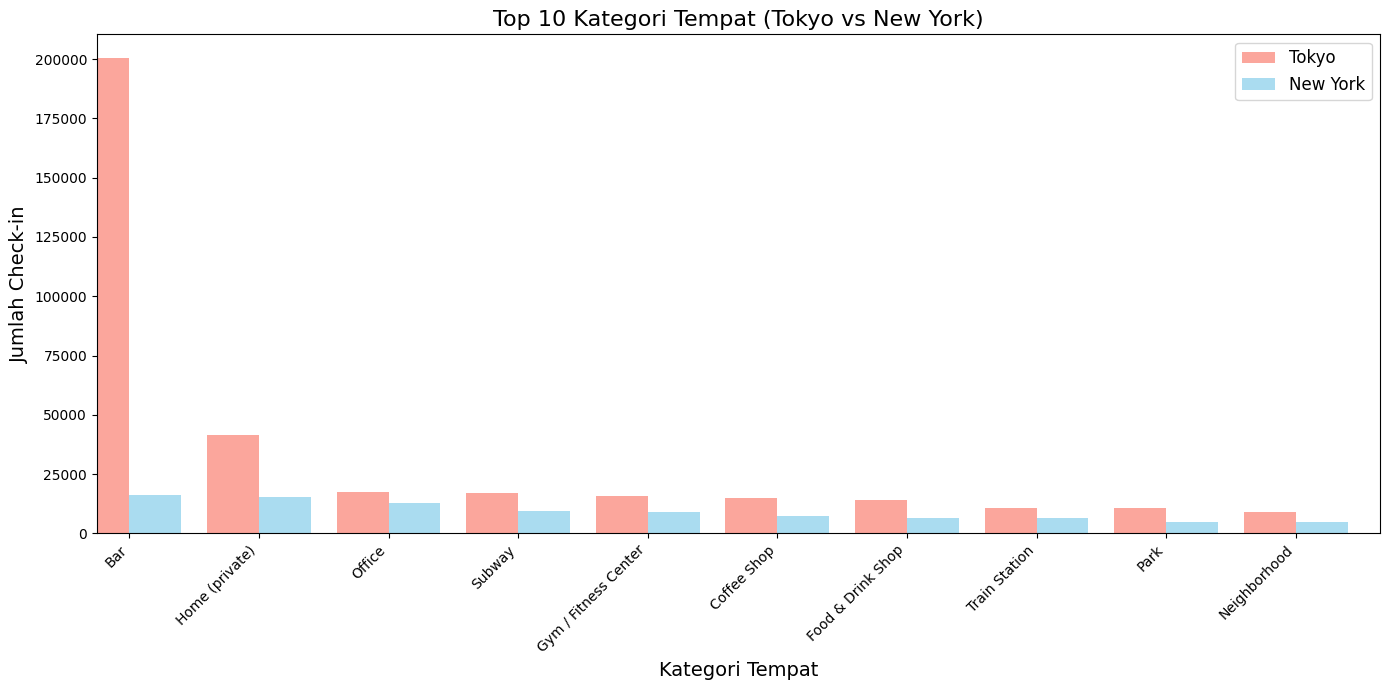

In [ ]:
# Bar Chart: Top 10 Venue Categories
top_categories_tky = data_tky['venueCategory'].value_counts().head(10)
top_categories_nyc = data_nyc['venueCategory'].value_counts().head(10)

plt.figure(figsize=(14, 7))
top_categories_tky.plot(kind='bar', color='salmon', alpha=0.7, label='Tokyo', position=1, width=0.4)
top_categories_nyc.plot(kind='bar', color='skyblue', alpha=0.7, label='New York', position=0, width=0.4)
plt.title('Top 10 Kategori Tempat (Tokyo vs New York)', fontsize=16)
plt.ylabel('Jumlah Check-in', fontsize=14)
plt.xlabel('Kategori Tempat', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


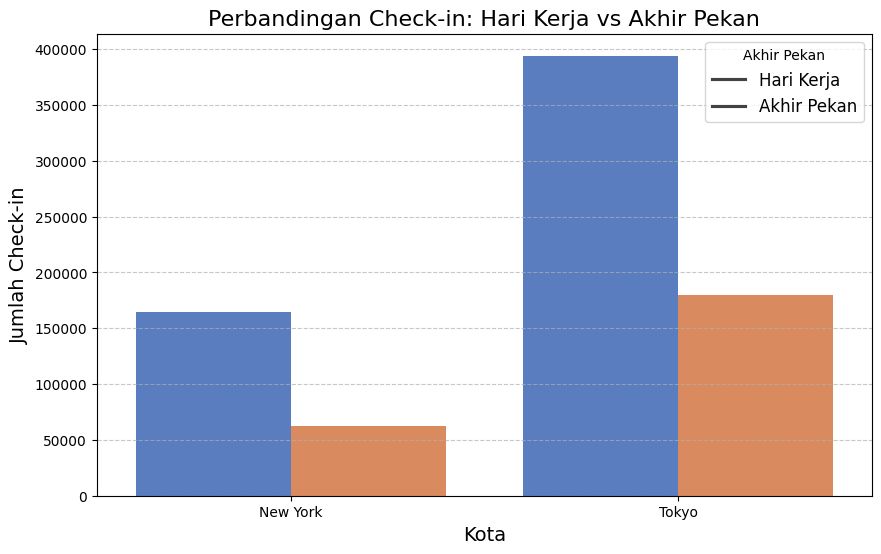

In [ ]:
# Bar Chart: Weekday vs Weekend Check-in
data_combined['weekend'] = data_combined['day_of_week'] >= 5
weekend_data = data_combined.groupby(['city', 'weekend']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.barplot(data=weekend_data, x='city', y='count', hue='weekend', palette='muted')
plt.title('Perbandingan Check-in: Hari Kerja vs Akhir Pekan', fontsize=16)
plt.xlabel('Kota', fontsize=14)
plt.ylabel('Jumlah Check-in', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Akhir Pekan', labels=['Hari Kerja', 'Akhir Pekan'], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


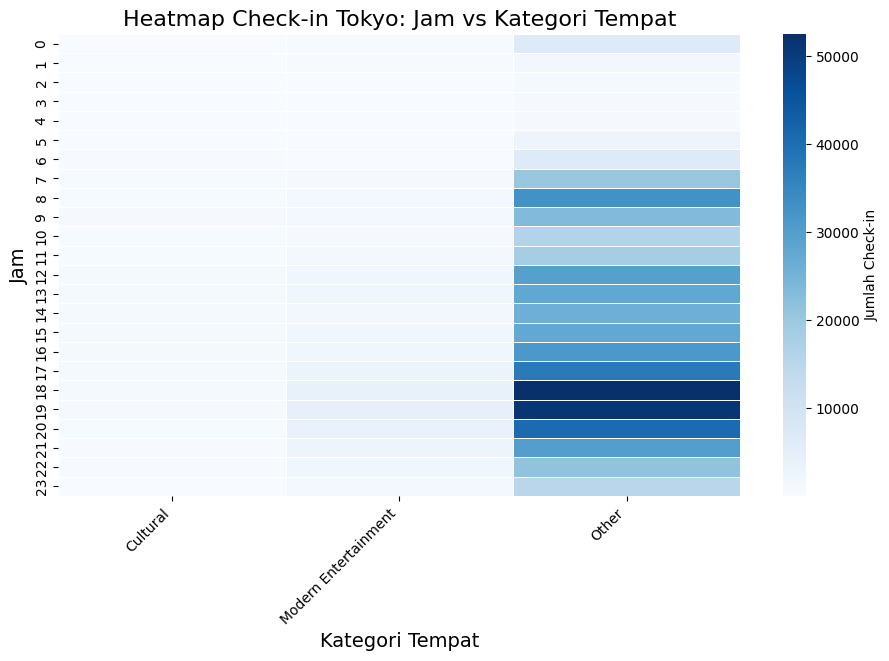

In [ ]:
# Heatmap: Check-in by Hour and Venue Category
pivot_tky = pd.crosstab(data_tky['hour'], data_tky['venueCategoryGrouped'])
pivot_nyc = pd.crosstab(data_nyc['hour'], data_nyc['venueCategoryGrouped'])

plt.figure(figsize=(11, 6))
sns.heatmap(pivot_tky, cmap='Blues', cbar_kws={'label': 'Jumlah Check-in'}, linewidths=0.5)
plt.title('Heatmap Check-in Tokyo: Jam vs Kategori Tempat', fontsize=16)
plt.xlabel('Kategori Tempat', fontsize=14)
plt.ylabel('Jam', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()




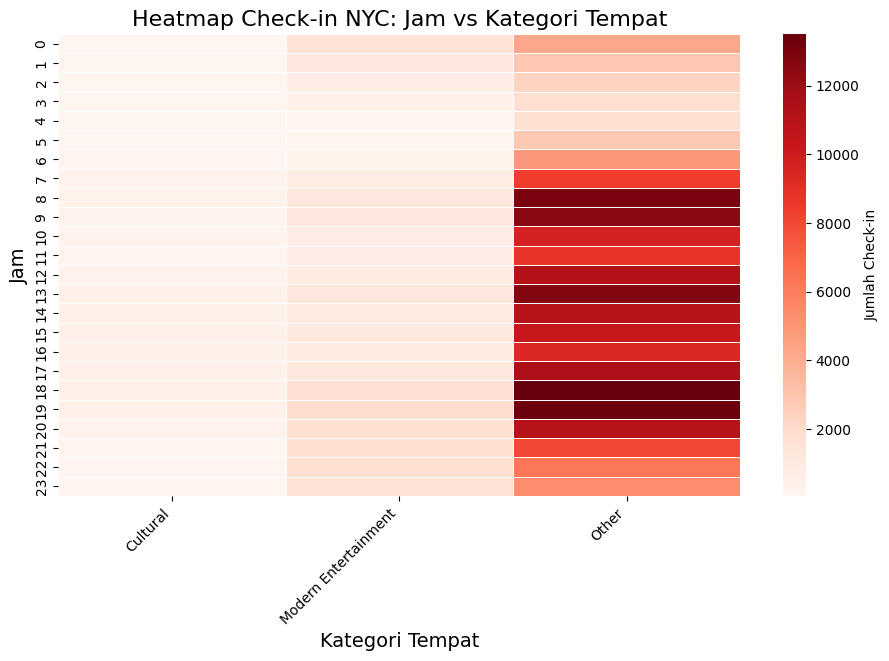

In [ ]:
plt.figure(figsize=(11, 6))
sns.heatmap(pivot_nyc, cmap='Reds', cbar_kws={'label': 'Jumlah Check-in'}, linewidths=0.5)
plt.title('Heatmap Check-in NYC: Jam vs Kategori Tempat', fontsize=16)
plt.xlabel('Kategori Tempat', fontsize=14)
plt.ylabel('Jam', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

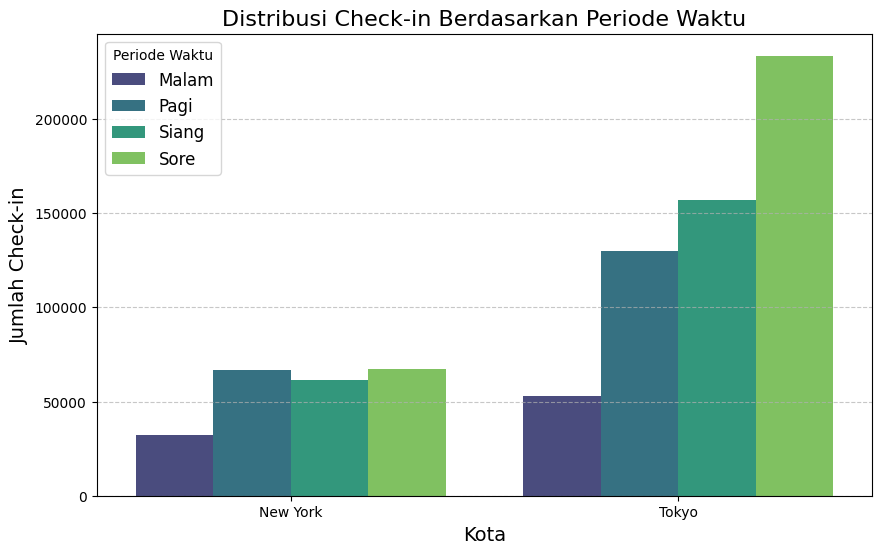

In [ ]:
# Stacked Bar Chart: Check-in by Period and City
period_data = data_combined.groupby(['city', 'period']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.barplot(data=period_data, x='city', y='count', hue='period', palette='viridis')
plt.title('Distribusi Check-in Berdasarkan Periode Waktu', fontsize=16)
plt.xlabel('Kota', fontsize=14)
plt.ylabel('Jumlah Check-in', fontsize=14)
plt.legend(title='Periode Waktu', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


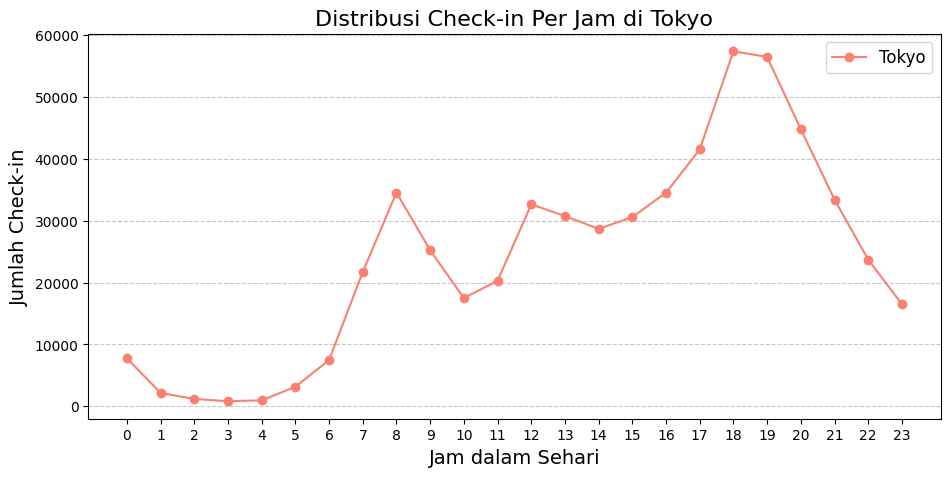

In [ ]:
plt.figure(figsize=(11, 5))
checkin_tky = data_tky.groupby('hour').size()
plt.plot(checkin_tky.index, checkin_tky.values, label='Tokyo', marker='o', color='salmon')
plt.title('Distribusi Check-in Per Jam di Tokyo', fontsize=16)
plt.xlabel('Jam dalam Sehari', fontsize=14)
plt.ylabel('Jumlah Check-in', fontsize=14)
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper right', fontsize=12)
plt.show()

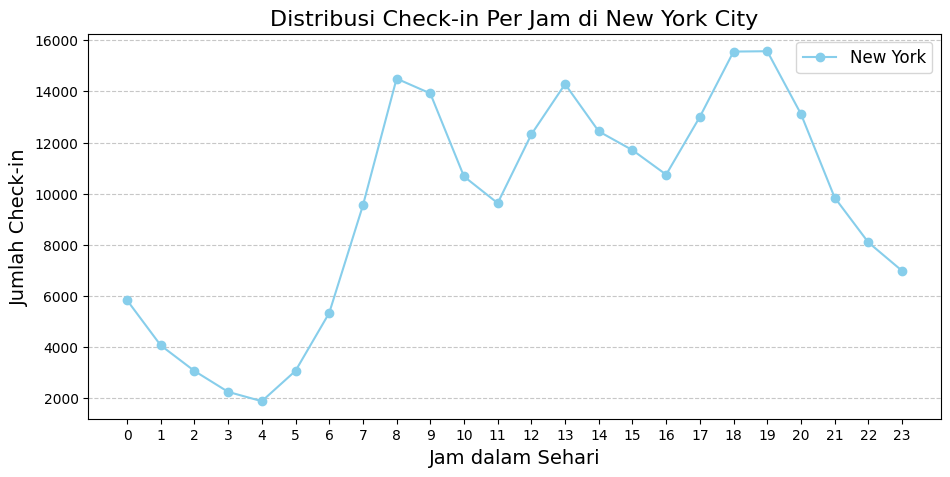

In [ ]:
plt.figure(figsize=(11, 5))
checkin_nyc = data_nyc.groupby('hour').size()
plt.plot(checkin_nyc.index, checkin_nyc.values, label='New York', marker='o', color='skyblue')
plt.title('Distribusi Check-in Per Jam di New York City', fontsize=16)
plt.xlabel('Jam dalam Sehari', fontsize=14)
plt.ylabel('Jumlah Check-in', fontsize=14)
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper right', fontsize=12)
plt.show()

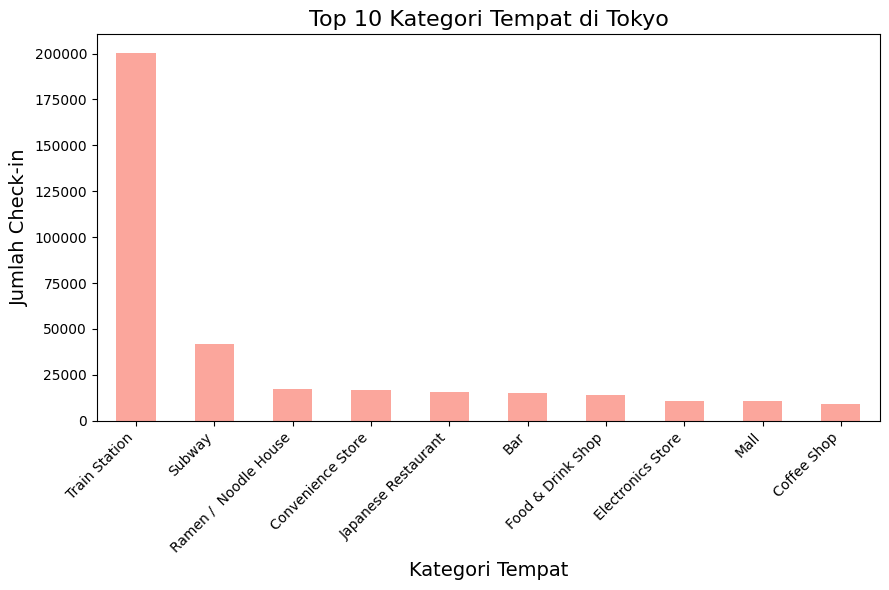

In [ ]:
top_categories_tky = data_tky['venueCategory'].value_counts().head(10)
plt.figure(figsize=(9, 6))
top_categories_tky.plot(kind='bar', color='salmon', alpha=0.7)
plt.title('Top 10 Kategori Tempat di Tokyo', fontsize=16)
plt.ylabel('Jumlah Check-in', fontsize=14)
plt.xlabel('Kategori Tempat', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

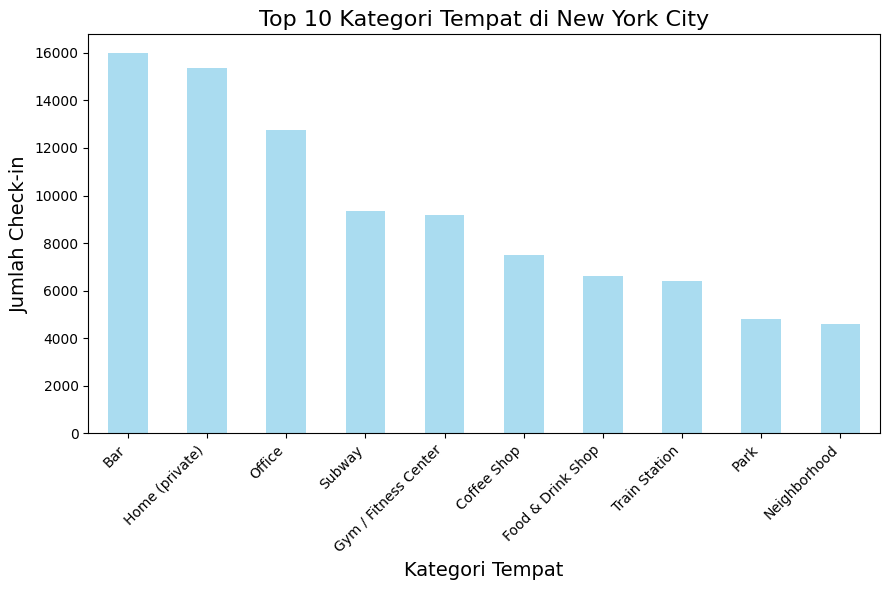

In [ ]:
# Bar Chart untuk New York City
top_categories_nyc = data_nyc['venueCategory'].value_counts().head(10)
plt.figure(figsize=(9, 6))
top_categories_nyc.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Top 10 Kategori Tempat di New York City', fontsize=16)
plt.ylabel('Jumlah Check-in', fontsize=14)
plt.xlabel('Kategori Tempat', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

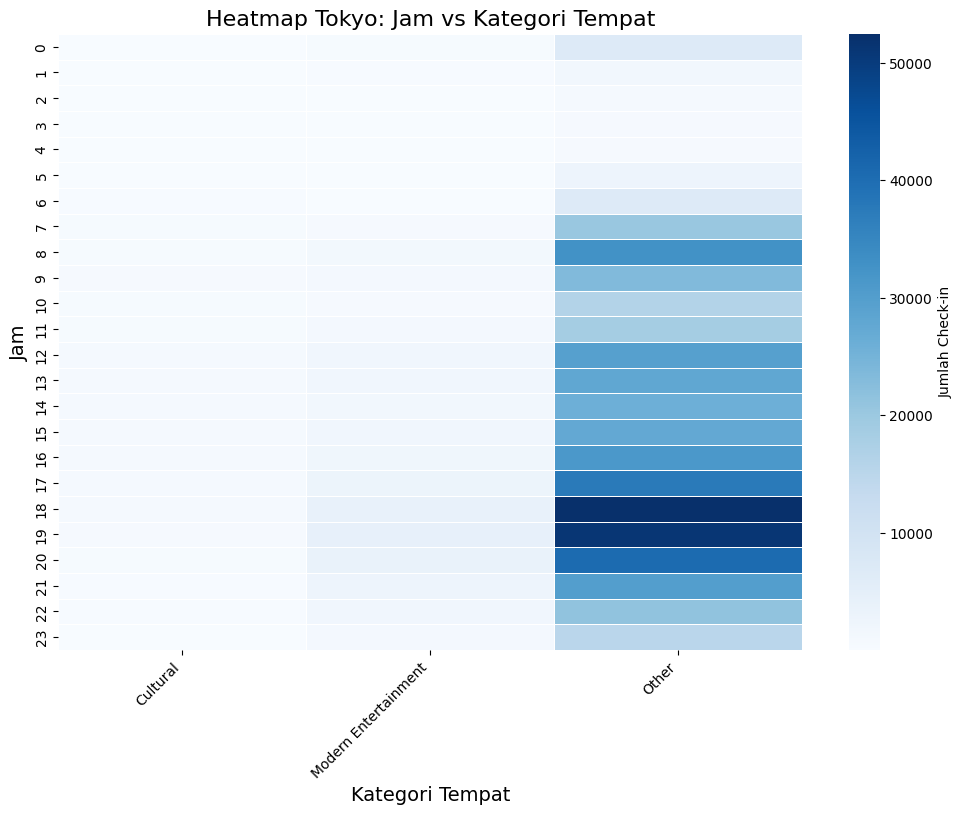

In [ ]:
# Heatmap untuk Tokyo
pivot_tky = pd.crosstab(data_tky['hour'], data_tky['venueCategoryGrouped'])
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_tky, cmap='Blues', cbar_kws={'label': 'Jumlah Check-in'}, linewidths=0.5)
plt.title('Heatmap Tokyo: Jam vs Kategori Tempat', fontsize=16)
plt.xlabel('Kategori Tempat', fontsize=14)
plt.ylabel('Jam', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

Statistik Deskriptif untuk Dataset Tokyo:
              userId       latitude      longitude  timezoneOffset
count  573703.000000  573703.000000  573703.000000   573703.000000
mean     1123.907593      35.676370     139.713214      539.966742
std       658.519789       0.058958       0.074697        5.451372
min         1.000000      35.510185     139.470878     -480.000000
25%       557.000000      35.650417     139.691390      540.000000
50%      1120.000000      35.685867     139.719274      540.000000
75%      1681.000000      35.704023     139.767101      540.000000
max      2293.000000      35.867150     139.912593      600.000000
{'Total Check-ins': 573703, 'Unique Users': 2293, 'Unique Venues': 61858, 'Average Latitude': 35.67637001430879, 'Average Longitude': 139.71321412104015, 'Timezone Offset (mean)': 539.9667423736672}

Statistik Deskriptif untuk Dataset New York City:
              userId       latitude      longitude  timezoneOffset
count  227428.000000  227428.000000  2

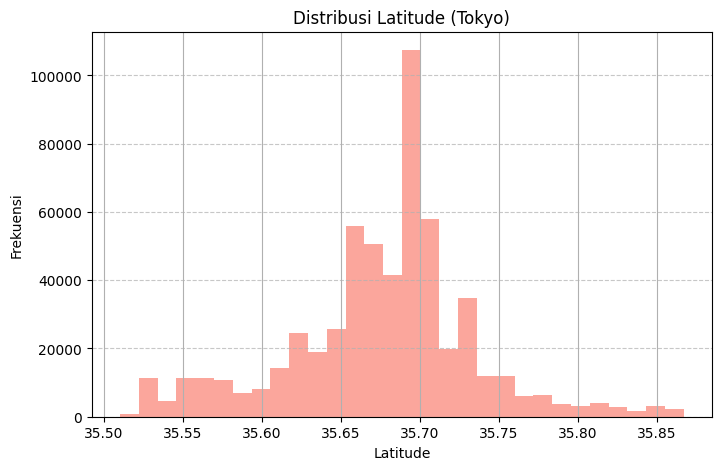

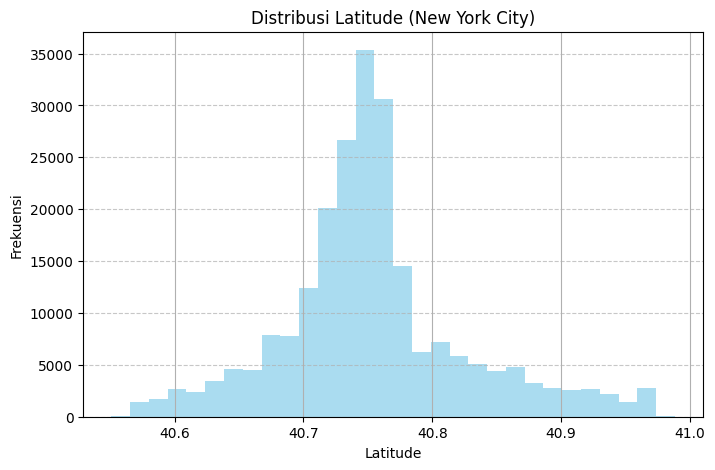

In [ ]:
# Import library
import pandas as pd

# Load datasets
data_tky = pd.read_csv("dataset_TSMC2014_TKY.csv")
data_nyc = pd.read_csv("dataset_TSMC2014_NYC.csv")

# Statistik Deskriptif untuk Tokyo Dataset
print("Statistik Deskriptif untuk Dataset Tokyo:")
print(data_tky.describe())  # Ringkasan statistik deskriptif untuk kolom numerik

# Statistik tambahan untuk kolom unik dan total check-in
tokyo_summary = {
    "Total Check-ins": len(data_tky),
    "Unique Users": data_tky['userId'].nunique(),
    "Unique Venues": data_tky['venueId'].nunique(),
    "Average Latitude": data_tky['latitude'].mean(),
    "Average Longitude": data_tky['longitude'].mean(),
    "Timezone Offset (mean)": data_tky['timezoneOffset'].mean(),
}
print(tokyo_summary)

# Statistik Deskriptif untuk NYC Dataset
print("\nStatistik Deskriptif untuk Dataset New York City:")
print(data_nyc.describe())  # Ringkasan statistik deskriptif untuk kolom numerik

# Statistik tambahan untuk kolom unik dan total check-in
nyc_summary = {
    "Total Check-ins": len(data_nyc),
    "Unique Users": data_nyc['userId'].nunique(),
    "Unique Venues": data_nyc['venueId'].nunique(),
    "Average Latitude": data_nyc['latitude'].mean(),
    "Average Longitude": data_nyc['longitude'].mean(),
    "Timezone Offset (mean)": data_nyc['timezoneOffset'].mean(),
}
print(nyc_summary)

# Visualisasi Distribusi Kolom Numerik (Optional)
import matplotlib.pyplot as plt

# Distribusi Latitude untuk Tokyo
plt.figure(figsize=(8, 5))
data_tky['latitude'].hist(bins=30, color='salmon', alpha=0.7)
plt.title('Distribusi Latitude (Tokyo)')
plt.xlabel('Latitude')
plt.ylabel('Frekuensi')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Distribusi Latitude untuk NYC
plt.figure(figsize=(8, 5))
data_nyc['latitude'].hist(bins=30, color='skyblue', alpha=0.7)
plt.title('Distribusi Latitude (New York City)')
plt.xlabel('Latitude')
plt.ylabel('Frekuensi')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# Statistik tambahan untuk kolom unik dan total check-in
tokyo_summary = {
    "Total Check-ins": len(data_tky),
    "Unique Users": data_tky['userId'].nunique(),
    "Unique Venues": data_tky['venueId'].nunique(),
    "Average Latitude": data_tky['latitude'].mean(),
    "Average Longitude": data_tky['longitude'].mean(),
    "Timezone Offset (mean)": data_tky['timezoneOffset'].mean(),
}
print(tokyo_summary)

{'Total Check-ins': 573703, 'Unique Users': 2293, 'Unique Venues': 61858, 'Average Latitude': 35.67637001430879, 'Average Longitude': 139.71321412104015, 'Timezone Offset (mean)': 539.9667423736672}


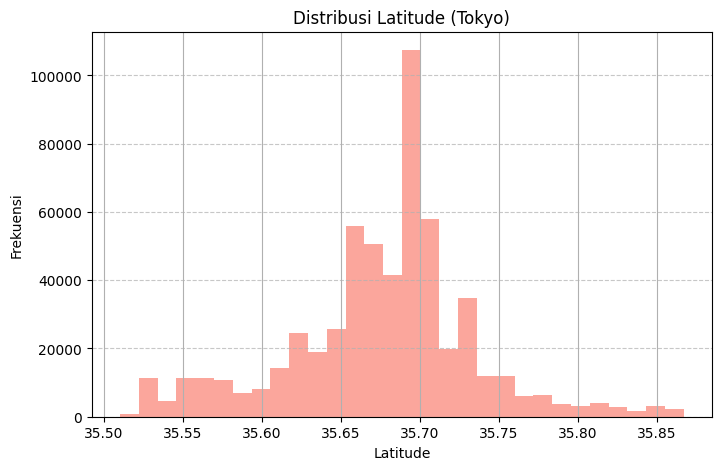

In [ ]:

# Distribusi Latitude untuk Tokyo
plt.figure(figsize=(8, 5))
data_tky['latitude'].hist(bins=30, color='salmon', alpha=0.7)
plt.title('Distribusi Latitude (Tokyo)')
plt.xlabel('Latitude')
plt.ylabel('Frekuensi')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


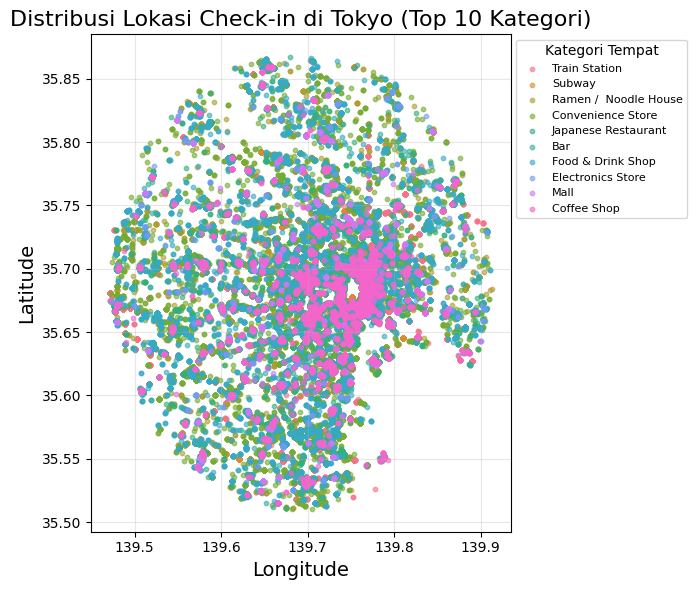

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 Kategori Tempat untuk Tokyo dan NYC
top_categories_tky = data_tky['venueCategory'].value_counts().head(10).index
top_categories_nyc = data_nyc['venueCategory'].value_counts().head(10).index

# Buat Subset Data untuk Top 10 Kategori
data_tky_filtered = data_tky[data_tky['venueCategory'].isin(top_categories_tky)]
data_nyc_filtered = data_nyc[data_nyc['venueCategory'].isin(top_categories_nyc)]

# Palet Warna untuk Top 10 Kategori
palette_tky = sns.color_palette('husl', len(top_categories_tky))
palette_nyc = sns.color_palette('husl', len(top_categories_nyc))

# Map Warna ke Kategori
color_map_tky = dict(zip(top_categories_tky, palette_tky))
color_map_nyc = dict(zip(top_categories_nyc, palette_nyc))

# Scatter Plot untuk Tokyo (Top 10 Kategori)
plt.figure(figsize=(7, 6))
for category, color in color_map_tky.items():
    subset = data_tky_filtered[data_tky_filtered['venueCategory'] == category]
    plt.scatter(subset['longitude'], subset['latitude'], alpha=0.6, s=10, color=color, label=category)

plt.title('Distribusi Lokasi Check-in di Tokyo (Top 10 Kategori)', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=8, title="Kategori Tempat")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

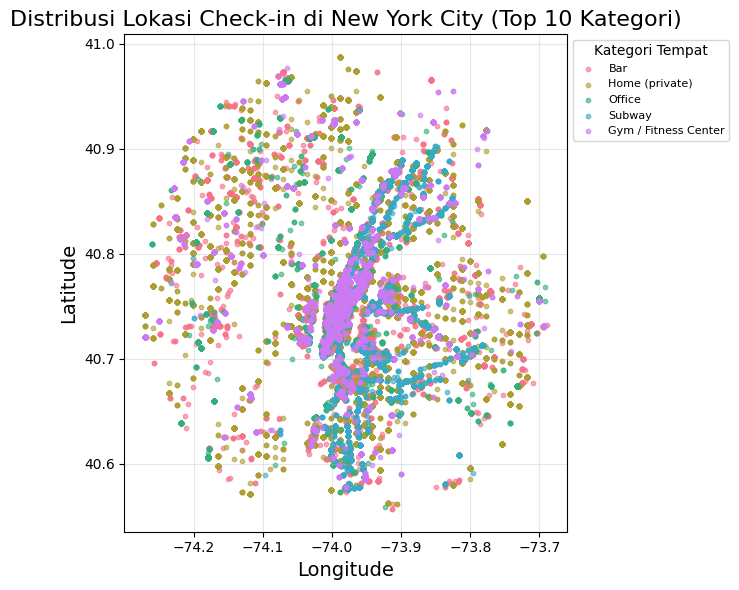

In [ ]:
# Scatter Plot untuk NYC (Top 10 Kategori)
plt.figure(figsize=(7, 6))
for category, color in color_map_nyc.items():
    subset = data_nyc_filtered[data_nyc_filtered['venueCategory'] == category]
    plt.scatter(subset['longitude'], subset['latitude'], alpha=0.6, s=10, color=color, label=category)

plt.title('Distribusi Lokasi Check-in di New York City (Top 10 Kategori)', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=8, title="Kategori Tempat")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
# Tentukan kategori tempat transportasi umum dan tempat hiburan
transport_categories = ['Train Station', 'Subway', 'Bus Station']
entertainment_categories = ['Bar', 'Nightlife Spot', 'Movie Theater', 'Amusement Park']

# Fungsi untuk menentukan hari kerja atau akhir pekan
def day_type(timestamp):
    weekday = pd.to_datetime(timestamp).weekday()  # 0=Senin, ..., 6=Minggu
    return 'Weekend' if weekday >= 5 else 'Weekday'

# Tambahkan kolom 'day_type' untuk Tokyo
data_tky['day_type'] = data_tky['utcTimestamp'].apply(day_type)
data_nyc['day_type'] = data_nyc['utcTimestamp'].apply(day_type)

# Filter data Tokyo dan NYC berdasarkan kategori
data_tky_transport = data_tky[data_tky['venueCategory'].isin(transport_categories)]
data_tky_entertainment = data_tky[data_tky['venueCategory'].isin(entertainment_categories)]
data_nyc_transport = data_nyc[data_nyc['venueCategory'].isin(transport_categories)]
data_nyc_entertainment = data_nyc[data_nyc['venueCategory'].isin(entertainment_categories)]


In [ ]:
# Hitung jumlah check-in berdasarkan 'day_type'
tky_counts = pd.concat([
    data_tky_transport['day_type'].value_counts().rename('Transport'),
    data_tky_entertainment['day_type'].value_counts().rename('Entertainment')
], axis=1).reset_index().rename(columns={'index': 'Day Type'})

nyc_counts = pd.concat([
    data_nyc_transport['day_type'].value_counts().rename('Transport'),
    data_nyc_entertainment['day_type'].value_counts().rename('Entertainment')
], axis=1).reset_index().rename(columns={'index': 'Day Type'})


In [ ]:
# Tambahkan kolom 'day_type' ke Tokyo dan NYC
data_tky['day_type'] = data_tky['utcTimestamp'].apply(lambda x: 'Weekend' if pd.to_datetime(x).weekday() >= 5 else 'Weekday')
data_nyc['day_type'] = data_nyc['utcTimestamp'].apply(lambda x: 'Weekend' if pd.to_datetime(x).weekday() >= 5 else 'Weekday')


In [ ]:
# Filter data berdasarkan kategori tempat
transport_categories = ['Train Station', 'Subway', 'Bus Station']
entertainment_categories = ['Bar', 'Nightlife Spot', 'Movie Theater', 'Amusement Park']

data_tky_transport = data_tky[data_tky['venueCategory'].isin(transport_categories)]
data_tky_entertainment = data_tky[data_tky['venueCategory'].isin(entertainment_categories)]
data_nyc_transport = data_nyc[data_nyc['venueCategory'].isin(transport_categories)]
data_nyc_entertainment = data_nyc[data_nyc['venueCategory'].isin(entertainment_categories)]

In [ ]:
# Hitung jumlah check-in berdasarkan 'day_type'
tky_counts = pd.concat([
    data_tky_transport['day_type'].value_counts().rename('Transport'),
    data_tky_entertainment['day_type'].value_counts().rename('Entertainment')
], axis=1).reset_index().rename(columns={'index': 'day_type'})

nyc_counts = pd.concat([
    data_nyc_transport['day_type'].value_counts().rename('Transport'),
    data_nyc_entertainment['day_type'].value_counts().rename('Entertainment')
], axis=1).reset_index().rename(columns={'index': 'day_type'})

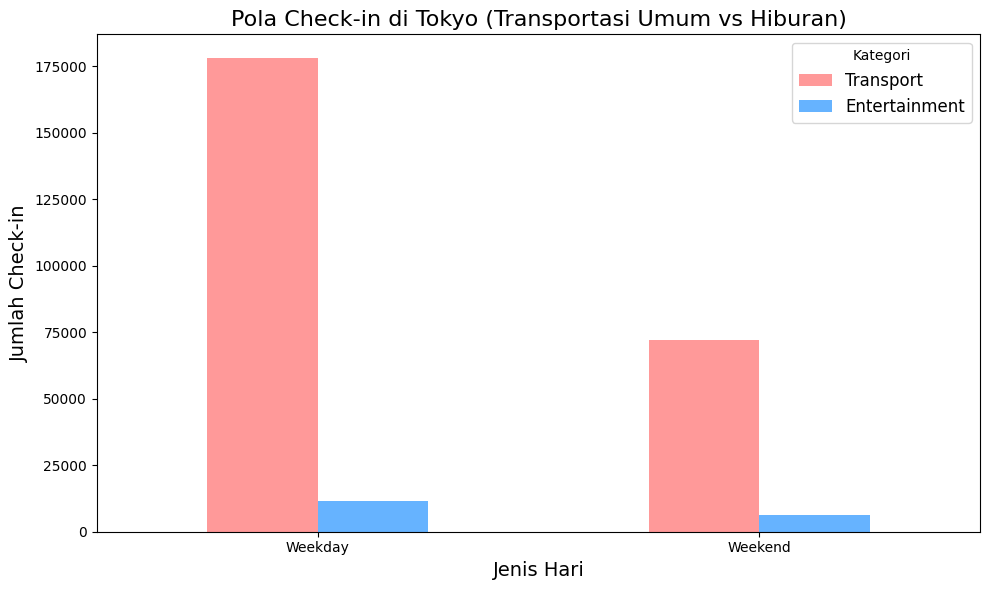

In [ ]:
# Visualisasi Tokyo
tky_counts.plot(x='day_type', kind='bar', figsize=(10, 6), color=['#ff9999', '#66b3ff'])
plt.title('Pola Check-in di Tokyo (Transportasi Umum vs Hiburan)', fontsize=16)
plt.ylabel('Jumlah Check-in', fontsize=14)
plt.xlabel('Jenis Hari', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Kategori', fontsize=12)
plt.tight_layout()
plt.show()

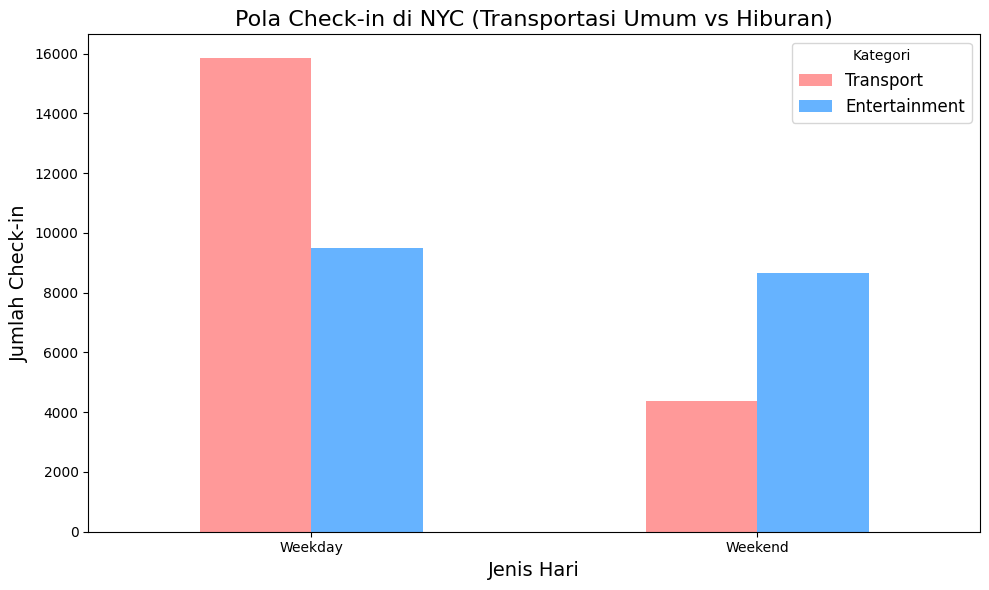

In [ ]:
# Visualisasi NYC
nyc_counts.plot(x='day_type', kind='bar', figsize=(10, 6), color=['#ff9999', '#66b3ff'])
plt.title('Pola Check-in di NYC (Transportasi Umum vs Hiburan)', fontsize=16)
plt.ylabel('Jumlah Check-in', fontsize=14)
plt.xlabel('Jenis Hari', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Kategori', fontsize=12)
plt.tight_layout()
plt.show()